In [1]:
import pandas as pd
df = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')
import datetime as dt

C:\Users\srivi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
# Summary:
# 1. Display first 5 records
# 2. Display the shape ie no.of records and columns
# 3. Display all the columns
# 4. EDA 1: Find which Complaint Type is the most common.
# 5. Calculate Resolution Time from Created Date and Closed Date. 
# 6. Convert the Resolution Time to seconds ie numeric value so it can be easily used for calculating mean response time.
# 7. EDA 2: Find which Compliant Type took maximum time to resolve.
# 8. EDA 3: Find Which borough recorded highest no.of complaints.
# 9. EDA 4: Find maximum complaints recorded for which location type (Street/Commerical/House of Worship etc.)
# 10. EDA 5: City wise breakdown of complaints.
# 11. EDA 6: Status of complaints ie. How many complaints Closed, Open etc.
# 12. EDA 7: Find which Complaint types are mostly open.
# 13. EDA 8: Find which kind of noise complaint is most frequently reported.
# 14. EDA 9: Find which month reported highest noise complaints.
# 15. EDA 10: Find which City took maximum time to resolve the complaints.
# 16. Whether the average response time across complaint types is similar or not (overall)?
# 17. Are the type of complaint or service requested and location related?

In [3]:
# 1. Display first 5 records
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [4]:
# 2. Display the shape ie no.of records and columns
df.shape

(300698, 53)

In [5]:
# 3. Display all the columns
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

<AxesSubplot:>

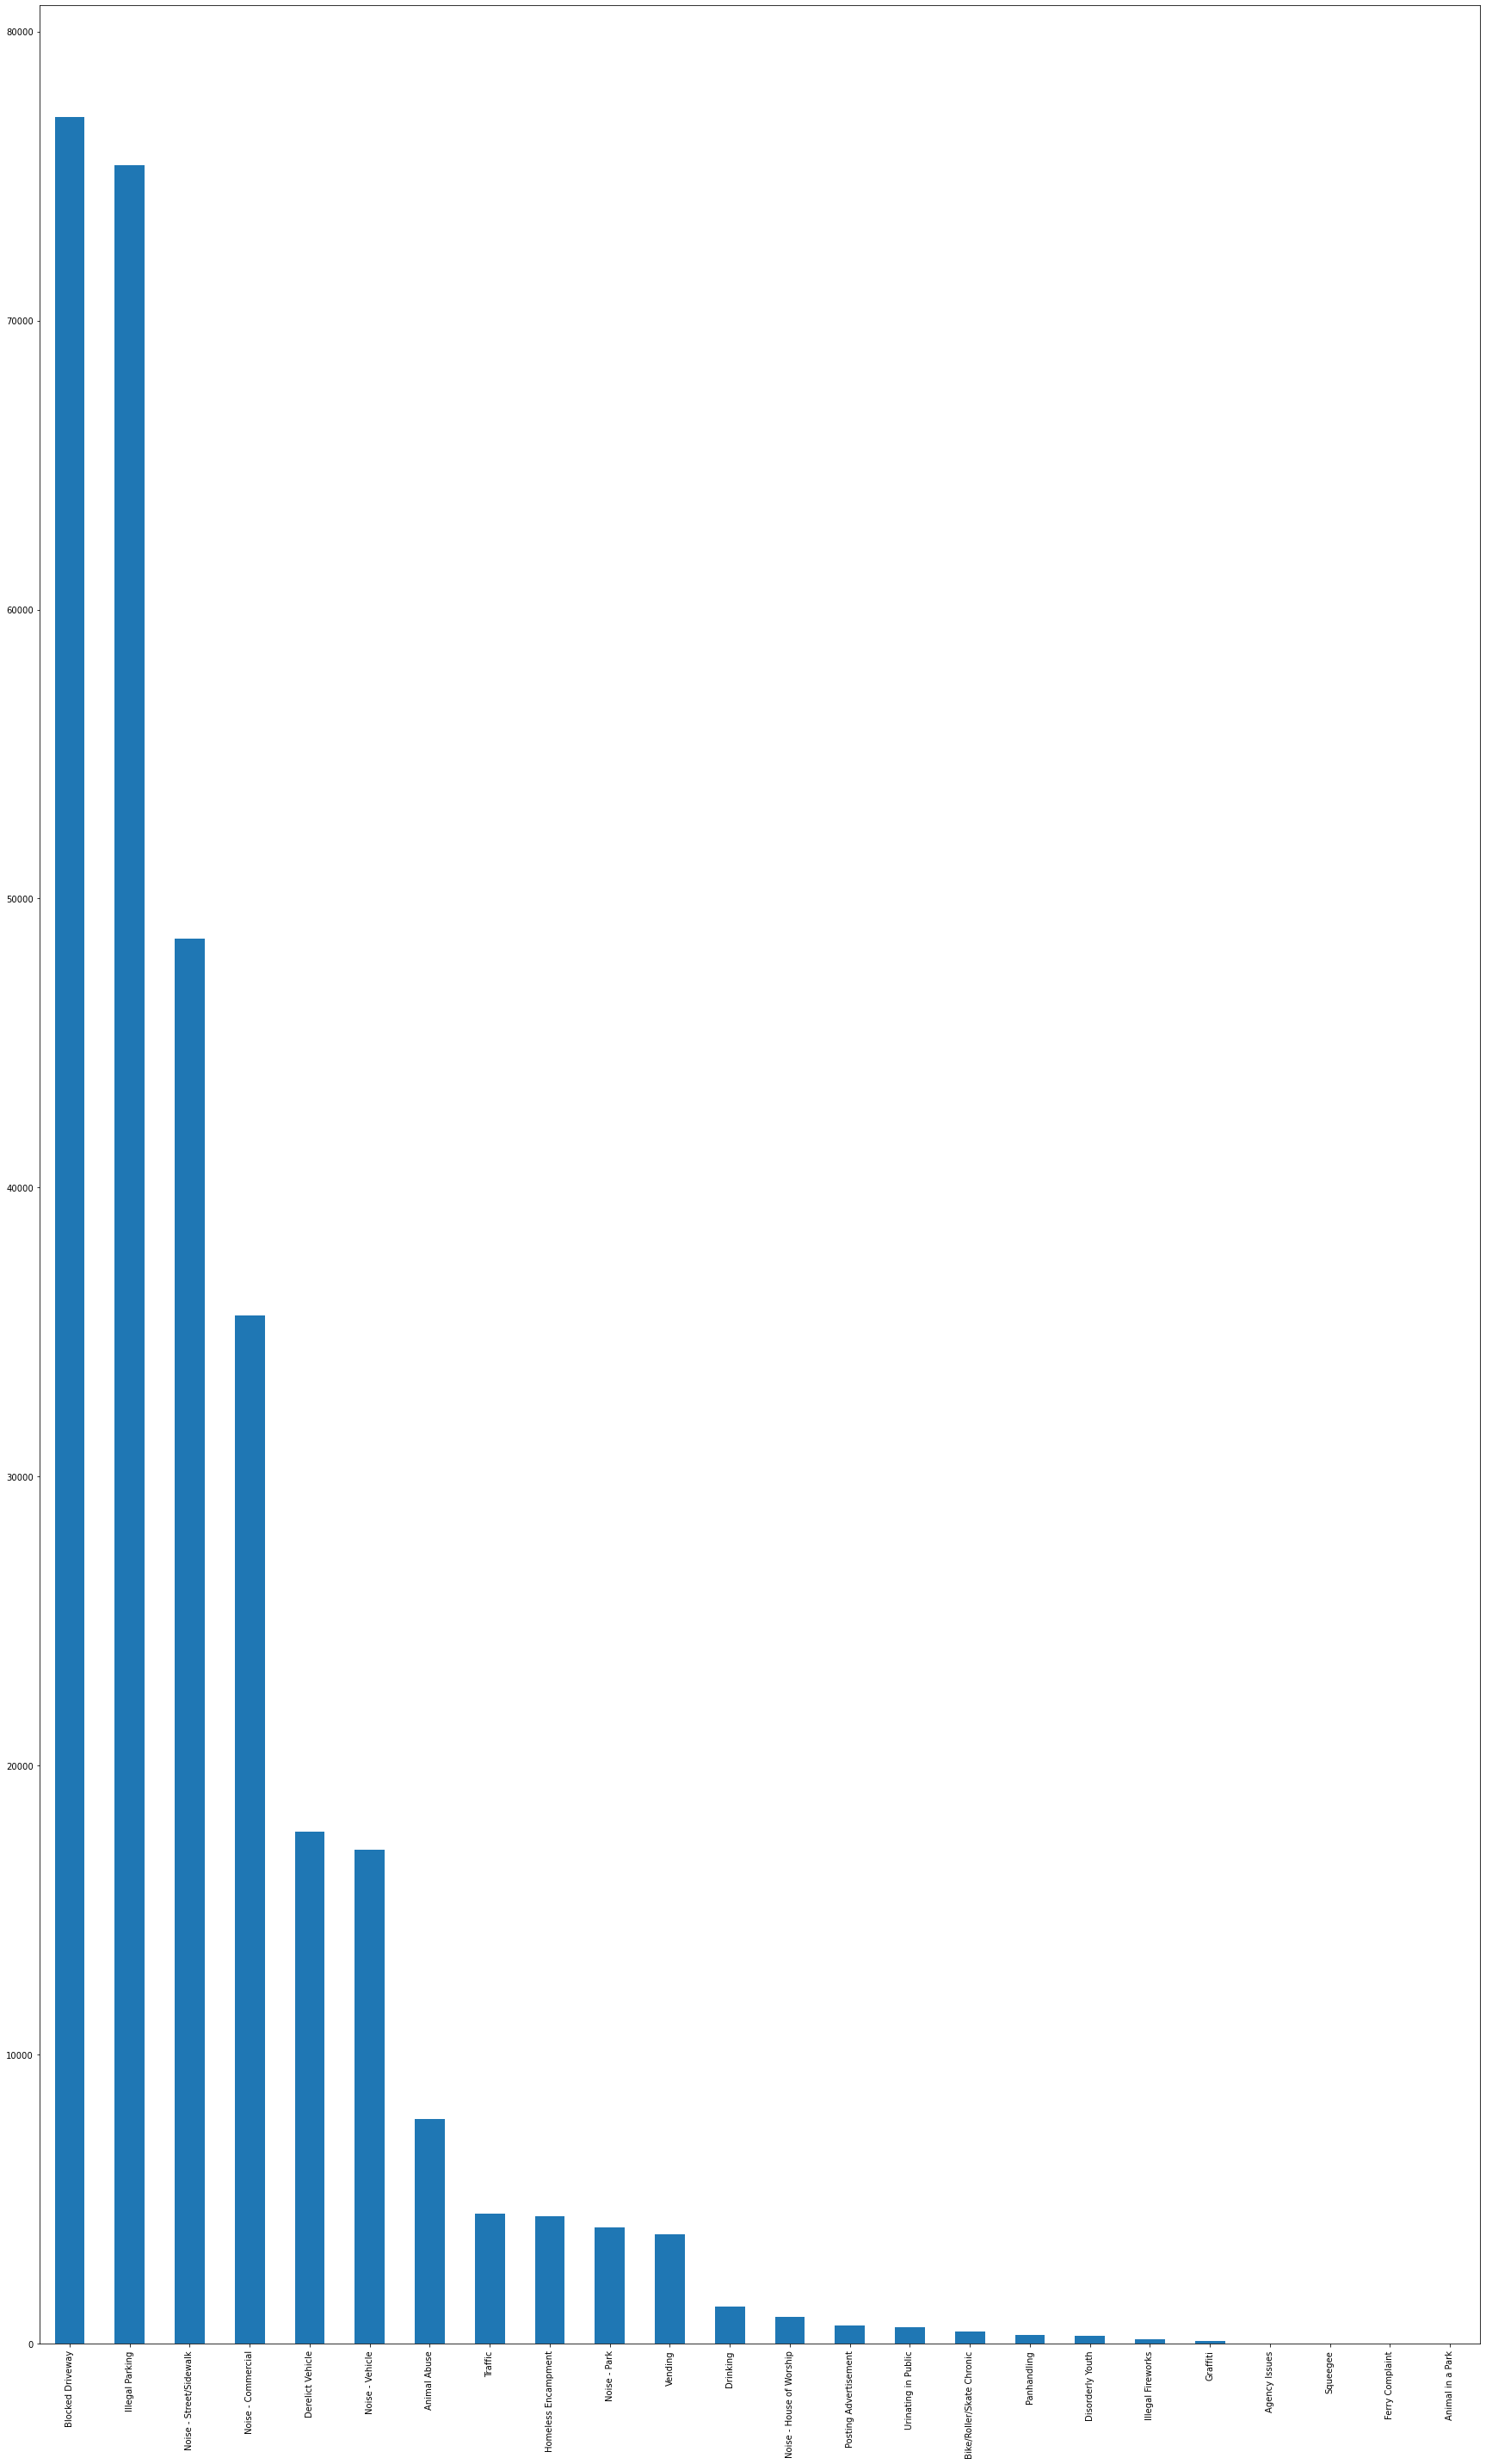

In [6]:
# 4. EDA 1: Find which Complaint Type is the most common:
# Ans: Blocked Driveway, Illegal Parking
df['Complaint Type'].value_counts().plot(kind="bar", figsize=(30,50), stacked=True)

In [7]:
df["Created Date"] = pd.to_datetime(df["Created Date"])
df["Closed Date"] = pd.to_datetime(df["Closed Date"])
df

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300693,30281872,2015-03-29 00:33:41,NaT,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NaN,CRESCENT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300694,30281230,2015-03-29 00:33:28,2015-03-29 02:33:59,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,100-17 87 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.694077,-73.846087,"(40.69407728322387, -73.8460866160573)"
300695,30283424,2015-03-29 00:33:03,2015-03-29 03:40:20,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,162 THROOP AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.699590,-73.944234,"(40.69959035300927, -73.94423377144169)"
300696,30280004,2015-03-29 00:33:02,2015-03-29 04:38:35,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,3151 EAST TREMONT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.837708,-73.834587,"(40.8377075854206, -73.83458731019586)"


In [8]:
# 5. Calculate Resolution Time from Created Date and Closed Date.
df['TimeToResolve'] = (df["Closed Date"] - df['Created Date'])
# 6. Convert the Resolution Time to seconds ie numeric value so it can be easily used for calculating mean response time.
df['TimeToResolveInSec'] = df['TimeToResolve'].dt.seconds
df['TimeToResolveInSec'].dtypes

dtype('float64')

In [9]:
# 7. EDA 2: Find which Compliant Type took maximum time to resolve.
# Ans: Graffiti, Derelict Vehicle
df.groupby('Complaint Type')['TimeToResolveInSec'].mean().sort_values(ascending=False)

Complaint Type
Graffiti                     20392.292035
Derelict Vehicle             20119.817887
Agency Issues                18937.166667
Animal Abuse                 16654.392508
Blocked Driveway             15784.925609
Illegal Parking              14915.077671
Homeless Encampment          14757.356884
Squeegee                     14564.250000
Vending                      13698.802899
Panhandling                  13475.734426
Drinking                     13021.657255
Bike/Roller/Skate Chronic    12744.169811
Disorderly Youth             12508.804196
Urinating in Public          12326.261824
Noise - Vehicle              12154.427817
Noise - Park                 11720.108901
Noise - Street/Sidewalk      11597.681463
Traffic                      11512.049155
Noise - Commercial           10768.414588
Noise - House of Worship     10658.844995
Illegal Fireworks             9425.815476
Posting Advertisement         6979.558642
Animal in a Park              3005.000000
Ferry Complaint    

<AxesSubplot:ylabel='Borough'>

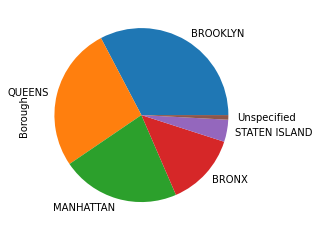

In [10]:
# 8. EDA 3: Find Which borough recorded highest no.of complaints.
# Ans: Brooklyn
df['Borough'].value_counts().plot(kind="pie", stacked=True)

In [11]:
# 9. EDA 4: Find maximum complaints recorded for which location type.
# Ans: Street/Sidewalk
df['Location Type'].value_counts()

Street/Sidewalk               249299
Store/Commercial               20381
Club/Bar/Restaurant            17360
Residential Building/House      6960
Park/Playground                 4773
House of Worship                 929
Residential Building             227
Highway                          215
Parking Lot                      117
House and Store                   93
Vacant Lot                        77
Commercial                        62
Roadway Tunnel                    35
Subway Station                    34
Bridge                             2
Park                               1
Ferry                              1
Terminal                           1
Name: Location Type, dtype: int64

In [12]:
# 10. EDA 5: City wise breakdown of complaint counts.
df['City'].value_counts()

BROOKLYN               98307
NEW YORK               65994
BRONX                  40702
STATEN ISLAND          12343
JAMAICA                 7296
ASTORIA                 6330
FLUSHING                5971
RIDGEWOOD               5163
CORONA                  4295
WOODSIDE                3544
SOUTH RICHMOND HILL     2774
OZONE PARK              2755
EAST ELMHURST           2734
ELMHURST                2673
WOODHAVEN               2464
MASPETH                 2462
LONG ISLAND CITY        2437
SOUTH OZONE PARK        2173
RICHMOND HILL           1904
FRESH MEADOWS           1899
QUEENS VILLAGE          1814
MIDDLE VILLAGE          1765
JACKSON HEIGHTS         1689
FOREST HILLS            1688
REGO PARK               1486
BAYSIDE                 1221
COLLEGE POINT           1220
FAR ROCKAWAY            1179
WHITESTONE              1098
HOLLIS                  1012
HOWARD BEACH             931
ROSEDALE                 922
SPRINGFIELD GARDENS      883
SAINT ALBANS             834
KEW GARDENS   

<AxesSubplot:>

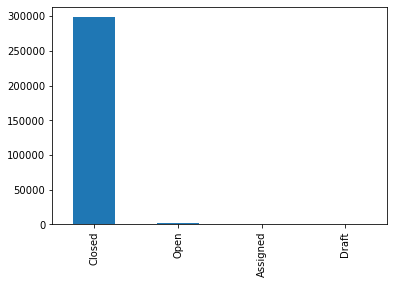

In [13]:
# 11. EDA 6: Status of complaints ie. How many complaints Closed, Open etc.
df['Status'].value_counts().plot(kind='bar')

In [14]:
open_complaints_df = df[df['Status']=='Open']

In [15]:
# 12. EDA 7: Find which Complaint types are mostly open.
# Ans: Illegal Parking
open_complaints_df.groupby(['Complaint Type'])['Unique Key'].count().sort_values(ascending=False)

Complaint Type
Illegal Parking              589
Noise - Street/Sidewalk      342
Noise - Commercial           176
Blocked Driveway             152
Derelict Vehicle             106
Noise - Vehicle               31
Noise - Park                  10
Animal Abuse                   8
Vending                        6
Drinking                       5
Traffic                        3
Bike/Roller/Skate Chronic      2
Noise - House of Worship       2
Homeless Encampment            2
Ferry Complaint                2
Posting Advertisement          2
Panhandling                    1
Name: Unique Key, dtype: int64

<AxesSubplot:xlabel='Complaint Type'>

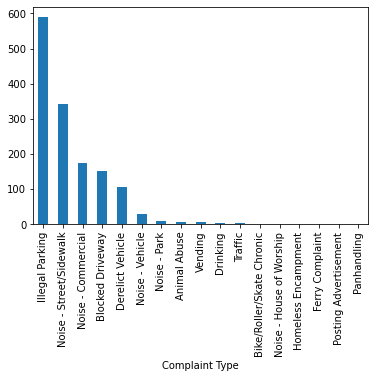

In [16]:
open_complaints_df.groupby(['Complaint Type'])['Unique Key'].count().sort_values(ascending=False).plot(kind='bar')

In [17]:
noise_complaints_df = df[df['Complaint Type'].str.contains('Noise')]
noise_complaints_df['Created Month'] = noise_complaints_df['Created Date'].dt.month


<ipython-input-17-3275c06ed3b7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noise_complaints_df['Created Month'] = noise_complaints_df['Created Date'].dt.month


<AxesSubplot:>

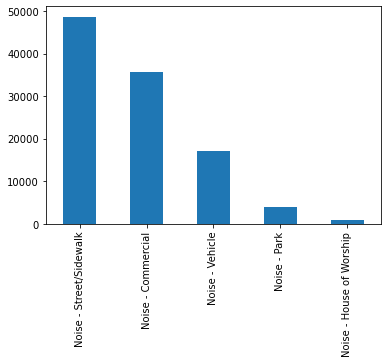

In [18]:
# 13. EDA 8: Find which kind of noise complaint is most frequently reported.
# Ans: Noise - Street/Sidewalk
noise_complaints_df['Complaint Type'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Created Month'>

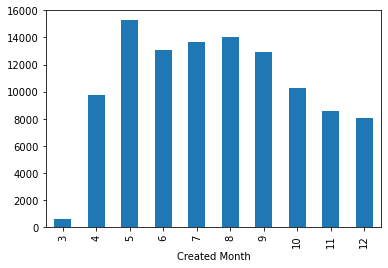

In [19]:
# 14. EDA 9: Find which month reported highest noise complaints.
# Ans: May month
noise_complaints_df.groupby('Created Month')['Complaint Type'].count().plot(kind='bar')

In [20]:
# 15. EDA 10: Find which City took maximum time to resolve the complaints.
# Ans: Floral Park
df.groupby('City')['TimeToResolveInSec'].mean().sort_values(ascending=False)

City
FLORAL PARK            27411.328947
ROSEDALE               23742.421909
QUEENS VILLAGE         23594.555127
SUNNYSIDE              22994.190871
SPRINGFIELD GARDENS    22501.097395
WOODSIDE               22037.129233
East Elmhurst          21772.071429
BELLEROSE              21644.794667
CAMBRIA HEIGHTS        21592.763103
LONG ISLAND CITY       21022.860837
GLEN OAKS              21007.222222
NEW HYDE PARK          19267.244898
BRONX                  19033.418336
MASPETH                18614.410402
Woodside               18005.000000
MIDDLE VILLAGE         17819.396034
HOWARD BEACH           17538.965628
WOODHAVEN              16951.517661
OZONE PARK             16908.010889
HOLLIS                 16723.961462
RICHMOND HILL          16508.854364
SOUTH RICHMOND HILL    16236.218097
SOUTH OZONE PARK       16158.906581
ASTORIA                15914.570142
SAINT ALBANS           15751.960432
JAMAICA                15629.190019
RIDGEWOOD              15270.735761
KEW GARDENS            

In [21]:
# 16. EDA 11: Which complaint type is most common in each City?
df.groupby(['Complaint Type','City']).count().sort_values(by='Unique Key',ascending=False)[:30]


,,Unique Key,Created Date,Closed Date,Agency,Agency Name,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,TimeToResolve,TimeToResolveInSec
Complaint Type,City,,,,,,,,,,,,,,,,,,,,,
Blocked Driveway,BROOKLYN,28148,28148,28147,28148,28148,28148,28131,28148,27754,27754,...,0,0,0,0,0,28137,28137,28137,28147,28147
Illegal Parking,BROOKLYN,27462,27462,27461,27462,27462,27462,27447,27462,23808,23808,...,0,0,0,0,0,27402,27402,27402,27461,27461
Noise - Street/Sidewalk,NEW YORK,20433,20433,20426,20433,20433,20433,20431,20433,16800,16800,...,0,0,0,0,0,20275,20275,20275,20426,20426
Noise - Commercial,NEW YORK,14550,14550,14544,14550,14550,14550,14549,14549,13520,13520,...,0,0,0,0,0,14536,14536,14536,14544,14544
Noise - Street/Sidewalk,BROOKLYN,13356,13356,13354,13356,13356,13356,13355,13356,11113,11113,...,0,0,0,0,0,13319,13319,13319,13354,13354
Blocked Driveway,BRONX,12755,12755,12754,12755,12755,12755,12751,12755,12573,12573,...,0,0,0,0,0,12745,12745,12745,12754,12754
Illegal Parking,NEW YORK,12128,12128,12125,12128,12128,12128,12126,12128,9730,9730,...,0,0,0,0,0,11984,11984,11984,12125,12125
Noise - Commercial,BROOKLYN,11463,11463,11458,11463,11463,11463,11462,11463,10622,10622,...,0,0,0,0,0,11457,11457,11457,11458,11458
Noise - Street/Sidewalk,BRONX,8892,8892,8890,8892,8892,8892,8892,8892,7592,7592,...,0,0,0,0,0,8867,8867,8867,8890,8890


In [22]:
# 16. Whether the average response time across complaint types is similar or not (overall)?
df.groupby('Complaint Type')['TimeToResolveInSec'].mean().sort_values(ascending=False)
# Ans: The avg. response time is not similar for the complaint types. 

Complaint Type
Graffiti                     20392.292035
Derelict Vehicle             20119.817887
Agency Issues                18937.166667
Animal Abuse                 16654.392508
Blocked Driveway             15784.925609
Illegal Parking              14915.077671
Homeless Encampment          14757.356884
Squeegee                     14564.250000
Vending                      13698.802899
Panhandling                  13475.734426
Drinking                     13021.657255
Bike/Roller/Skate Chronic    12744.169811
Disorderly Youth             12508.804196
Urinating in Public          12326.261824
Noise - Vehicle              12154.427817
Noise - Park                 11720.108901
Noise - Street/Sidewalk      11597.681463
Traffic                      11512.049155
Noise - Commercial           10768.414588
Noise - House of Worship     10658.844995
Illegal Fireworks             9425.815476
Posting Advertisement         6979.558642
Animal in a Park              3005.000000
Ferry Complaint    

 But as seen above, the avg. response time is close for Noise - Street/Sidewalk (11597.681463) and Traffic( (11512.049155). 
 Lets use hypothesis testing to determine whether the avg. response time is same for these 2 complaint types.
 Null Hypothesis - avg. response time is the same.
 Alternate Hypothesis  - avg. response time is not the same.
 Lets assume Null Hypothesis is true. That is, we assume that values stated by alternate hypothesis happened by pure luck /chance.
 Now lets find the probability of getting that value by luck/chance. The probability of getting a value this extreme is called p-value.
 Lets define alpha (ie significance level). The default value fo alpha is 0.05. This means if I can tolerate 5% error, then 95% confidence.
 If p-value < alpha, the probabibility that the values stated by alternated hypothesis happened by chance is very low. 
 Which means, this didnt happen by chance. So, reject the null hypothesis and accept the alternate hypothesis. 
 Else, if p-value > alpha, there is high probability that the values stated by alternated hypothesis happened by chance.
 In this case, fail to reject null hypothesis.

In [23]:
# Null Hypothesis (Ho)- avg. response time is the same.
# Alternate Hypothesis  (Ha)- avg. response time is not the same.

df_noise_street = df[df['Complaint Type']=='Noise - Street/Sidewalk']
#df_noise_street = df_noise_street.loc[:,['TimeToResolveInSec']]
df_noise_street = df_noise_street['TimeToResolveInSec']
df_noise_street = df_noise_street.dropna()
df_noise_street.mean()

11597.681462684084

In [24]:
df_traffic = df[df['Complaint Type']=='Traffic']
#df_traffic = df_traffic.loc[:,['TimeToResolveInSec']]
df_traffic = df_traffic['TimeToResolveInSec']
df_traffic = df_traffic.dropna()
df_traffic.mean()

11512.04915480427

In [25]:
# Calculate the T-test for the means of the 2 dataframes.
import scipy.stats as stats
p_value = stats.ttest_ind(df_traffic,df_noise_street).pvalue
print('p-value:',p_value)
alpha = 0.05
if p_value <= alpha:
    print("Reject null hypothesis, avg response time for Noise - Street/Sidewalk and Traffic are different")
else:
    print("Accept null hypothesis, avg response time for Noise - Street/Sidewalk and Traffic are same")

p-value: 0.6474398525945364
Accept null hypothesis, avg response time for Noise - Street/Sidewalk and Traffic are same


In [26]:
#17. Are the type of complaint or service requested and location related?
# We will be using Chi - squared test for this.
contingency_table = pd.crosstab(df['City'],df['Complaint Type'])

In [27]:
contingency_table

Complaint Type,Animal Abuse,Animal in a Park,Bike/Roller/Skate Chronic,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Graffiti,Homeless Encampment,Illegal Fireworks,...,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Panhandling,Posting Advertisement,Squeegee,Traffic,Urinating in Public,Vending
City,,,,,,,,,,,,,,,,,,,,,
ARVERNE,38,0,0,35,27,2,1,1,4,0,...,11,2,29,7,1,0,0,0,1,1
ASTORIA,125,0,15,2618,351,3,35,4,32,4,...,19,61,386,204,1,1,0,47,9,54
Astoria,0,0,0,116,12,0,0,0,0,0,...,0,0,114,0,0,0,0,0,0,0
BAYSIDE,37,0,0,377,198,1,1,3,2,0,...,2,4,15,16,0,0,0,9,0,2
BELLEROSE,7,0,1,95,89,2,1,0,1,1,...,1,1,13,10,1,1,0,7,1,0
BREEZY POINT,2,0,0,3,3,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,0
BRONX,1415,0,20,12755,1953,63,188,9,247,24,...,79,547,8892,3396,19,17,0,355,51,379
BROOKLYN,2394,0,111,28148,5181,72,257,43,857,61,...,340,1555,13356,5177,49,45,0,1085,136,515
CAMBRIA HEIGHTS,11,0,0,147,115,0,0,0,5,1,...,2,0,25,77,0,0,0,6,0,0


In [28]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

'''
Ho: complaint type is independent of location
ha: complaint type is location dependent
'''
stat, p_value, dof, expected = chi2_contingency(contingency_table)

print('p-value of chi-square test is :', p_value)
print('degree of freedom:', dof)
print('expected:', expected)
print('---------------------------------------------------------')
confidence = 0.95

# interpret test-statistic
critical = chi2.ppf(confidence, dof)
print('confidence=%.3f, critical=%.3f, stat=%.3f' % (confidence, critical, stat))
print('interpret test-statistic')
print('------------------------')
if abs(stat) >= critical:
    print('Reject Ho, complaint type is location dependent')
else:
    print('Fail to Reject Ho (Accept Ho), complaint type is independent of location')

# interpret p-value
print('interpret p-value')
print('-----------------')
alpha = 1 - confidence
if p_value <= alpha:
    print("Reject Ho, complaint type is location dependent")
else:
    print("Fail to Reject Ho (Accept Ho), complaint type is independent of location")



p-value of chi-square test is : 0.0
degree of freedom: 1092
expected: [[5.73241100e+00 7.38046993e-04 3.11455831e-01 ... 3.31752124e+00
  4.36923820e-01 2.80088834e+00]
 [1.64937098e+02 2.12356249e-02 8.96143369e+00 ... 9.54541337e+01
  1.25714899e+01 8.05891963e+01]
 [1.86824486e+01 2.40536225e-03 1.01506287e+00 ... 1.08121033e+01
  1.42397445e+00 9.12834973e+00]
 ...
 [6.42030032e+01 8.26612633e-03 3.48830531e+00 ... 3.71562378e+01
  4.89354679e+00 3.13699494e+01]
 [9.23439299e+01 1.18892661e-02 5.01727030e+00 ... 5.34422512e+01
  7.03844554e+00 4.51197649e+01]
 [3.12676964e+00 4.02571087e-04 1.69884999e-01 ... 1.80955704e+00
  2.38322084e-01 1.52775728e+00]]
---------------------------------------------------------
confidence=0.950, critical=1169.990, stat=119769.347
interpret test-statistic
------------------------
Reject Ho, complaint type is location dependent
interpret p-value
-----------------
Reject Ho, complaint type is location dependent


Complaint type and location are related to each other.

Conclusion:
1. Blocked Driveway and illegal parking are the most commonly reported complaint types.
2. Graffiti and Derelict vehicle took highest time to resolve.
3. Brooklyn recorded highest number of complaints.
4. MAximum complaints recorder in Street/Sidewalk.
5. Complaints mostly in open status : Illegal Parking.
6. Noise - street/sidewalk is the most commonly reported noise complaint.
7. May month reported highest number of complaints. Next is August.
8. Floral Park City took longest time to resolve the complaints.
9. Whether the average response time across complaint types is similar or not (overall)? Overall not similar, but for some complaint types like Noise - street/sidewalk and Traffic, the avg. response times were similar. This was confirmed using hypothesis testing.
10. Are the type of complaint or service requested and location related? Yes, Complaint type and location are related to each other. This was confirmed using Chi squared test.